In [11]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Dense,Flatten,SimpleRNN
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [3]:
max_features = 10000  
max_length = 200 

In [7]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [9]:
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

In [17]:
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_length),
    SimpleRNN(64),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history=model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.5724 - loss: 0.6542 - val_accuracy: 0.7364 - val_loss: 0.5274
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 0.7452 - loss: 0.5140 - val_accuracy: 0.7335 - val_loss: 0.5245
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.7884 - loss: 0.4531 - val_accuracy: 0.7613 - val_loss: 0.5198
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.8211 - loss: 0.4044 - val_accuracy: 0.7367 - val_loss: 0.5527
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.8246 - loss: 0.3882 - val_accuracy: 0.7808 - val_loss: 0.4889


In [25]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7794 - loss: 0.4944
Test Accuracy: 78.08%


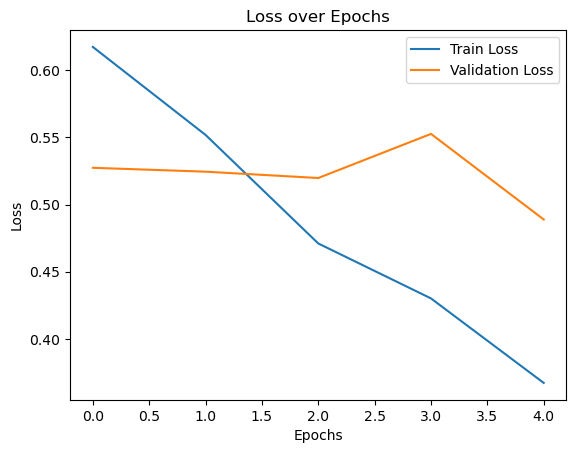

In [27]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

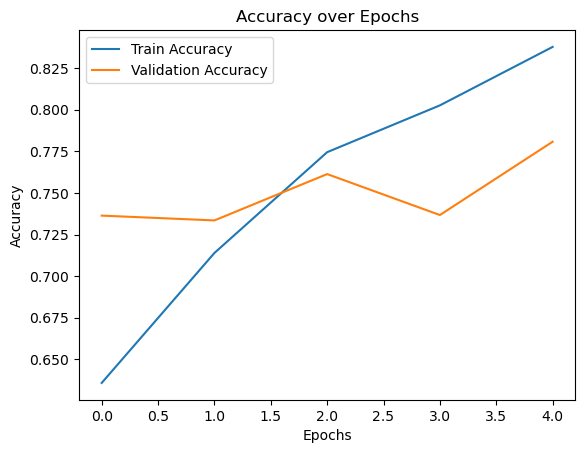

In [29]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()